In [52]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv("Cleaned_Titanic_Data.csv")

In [26]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_encoded,Embarked_encoded
0,0,3,male,22.0,1,0,7.2500,S,1,2
1,1,1,female,38.0,1,0,71.2833,C,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,2
3,1,1,female,35.0,1,0,53.1000,S,0,2
4,0,3,male,35.0,0,0,8.0500,S,1,2


In [23]:
encoder = LabelEncoder()

In [24]:
df['Sex_encoded'] = encoder.fit_transform(df['Sex'])

In [25]:
df['Embarked_encoded'] = encoder.fit_transform(df['Embarked'])

In [27]:
X = df[['Pclass', 'Sex_encoded', 'Embarked_encoded', 'Parch', 'SibSp', 'Parch', 'Fare']]

In [28]:
y = df['Survived']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [31]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_prediction = model.predict(X_test)

In [34]:
model.score(X_train, y_train)

0.8019662921348315

In [36]:
print("Accuracy:", accuracy_score(y_test, y_prediction))

Accuracy: 0.7597765363128491


In [38]:
X_test.count()

Pclass              179
Sex_encoded         179
Embarked_encoded    179
Parch               179
SibSp               179
Parch               179
Fare                179
dtype: int64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [43]:
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
model1.score(X_train, y_train)

0.9311797752808989

In [47]:
y_pred = model1.predict(X_test)

In [49]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8156424581005587


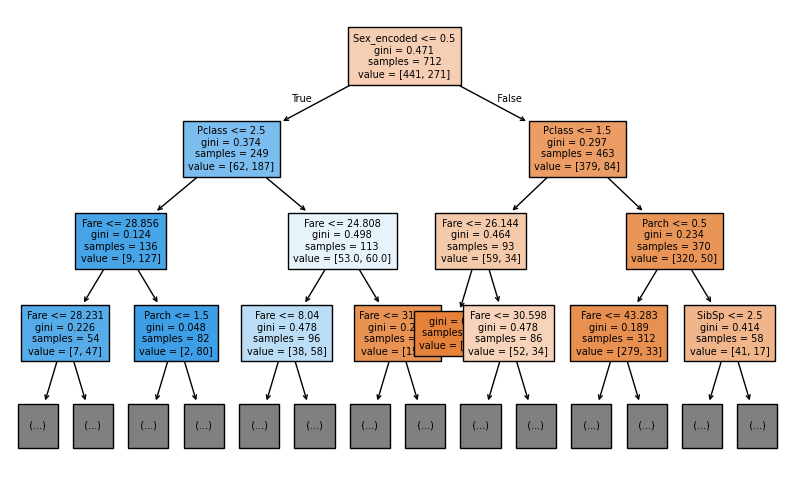

In [56]:
plt.figure(figsize=(10,6))
plot_tree(model1, filled=True, feature_names=['Pclass', 'Sex_encoded', 'Embarked_encoded', 'Parch', 'SibSp', 'Parch', 'Fare'], max_depth=3, fontsize=7)
plt.show()

In [57]:
df['Pclass'].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64